In [51]:
# ---------------------------------------- File 3_LAC_SN_dis ---------------------------------------- #
# This is the third step of creating the NSMI for the Netherlands. 
# This script deals the datasets of Statistics Netherlands containing the neighborhood distance to amenities
# This script performs the data loading, cleaning and descriptive statistics analysis.

# Importing the libraries for this script
import cbsodata	
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from googletrans import Translator
import re
import numpy as np
from ydata_profiling import ProfileReport

In [52]:
# ---------------------------------------------- PART 1 ---------------------------------------------- #	
# This first part of the script will locate the distance to amenities datasets of the Statistics Nethelands datasets and will perform the data cleaning and preparation.

In [53]:
# This piece of code is used to read the data from the desired Statistics Netherlands datasets via the SN (Statistics Nethelands) API and print the information.
info_CBS_2018 = cbsodata.get_info('84463NED')
info_CBS_2019 = cbsodata.get_info('84718NED')
info_CBS_2020 = cbsodata.get_info('84953NED')
info_CBS_2021 = cbsodata.get_info('85231NED')
info_CBS_2022 = cbsodata.get_info('85560NED')
print(info_CBS_2018)
print(info_CBS_2019)
print(info_CBS_2020)    
print(info_CBS_2021)
print(info_CBS_2022)

{'ID': 0, 'Title': 'Nabijheid voorzieningen; afstand locatie, wijk- en buurtcijfers 2018', 'ShortTitle': 'Nabijheid voorzieningen; buurt 2018', 'Identifier': '84463NED', 'Summary': 'Aantal en afstand tot voorzieningen zoals restaurants, treinstations,\nbibliotheken en kinderopvang naar gemeenten, wijken en buurten', 'Modified': '2022-10-26T02:00:00', 'ReasonDelivery': 'Herontwerp', 'ExplanatoryText': 'Met ingang van oktober 2022 worden variabelen over de nabijheid van banen toegevoegd aan deze tabel.', 'Language': 'nl', 'Catalog': 'CBS', 'Frequency': 'Tweemaalperjaar', 'Period': '2018', 'ShortDescription': '\nDeze tabel bevat cijfers over gemiddelde reisafstanden voor inwoners van Nederland van hun woonadres naar de dichtstbijzijnde voorzieningen (bijvoorbeeld school, huisarts of bibliotheek) voor 2018. In de tabel zijn ook cijfers opgenomen over het aantal voorzieningen dat zich binnen een bepaalde afstand van het woonadres bevindt. Deze gegevens zijn berekend als gemiddelde over alle

In [54]:
# This piece of code is used to read the data from the desired CBS-datasets via the CBS API and print the columns of the datasets in a list. 

# Loading the datasets.
CBS_2018 = pd.DataFrame(cbsodata.get_data('84463NED'))
CBS_2019 = pd.DataFrame(cbsodata.get_data('84718NED'))
CBS_2020 = pd.DataFrame(cbsodata.get_data('84953NED'))
CBS_2021 = pd.DataFrame(cbsodata.get_data('85231NED'))
CBS_2022 = pd.DataFrame(cbsodata.get_data('85560NED'))

# Display the first 10 rows of the datasets.
display(CBS_2018.head(10))
display(CBS_2019.head(10))
display(CBS_2020.head(10))
display(CBS_2021.head(10))
display(CBS_2022.head(10))

# Get a list of the columns.
CBS_2018_list = CBS_2018.columns.tolist()
CBS_2019_list = CBS_2019.columns.tolist()
CBS_2020_list = CBS_2020.columns.tolist()
CBS_2021_list = CBS_2021.columns.tolist()
CBS_2022_list = CBS_2022.columns.tolist()

# Printing the columns of the datasets in a list.
print(CBS_2018_list)
print(CBS_2019_list)
print(CBS_2020_list)
print(CBS_2021_list)
print(CBS_2022_list)

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AfstandTotHuisartsenpraktijk_5,Binnen1Km_6,Binnen3Km_7,Binnen5Km_8,...,Binnen5Km_120,Binnen10Km_121,Binnen20Km_122,AfstandTotSauna_123,AfstandTotZonnebank_124,AfstandTotAttractie_125,Binnen10Km_126,Binnen20Km_127,Binnen50Km_128,AfstandTotBrandweerkazerne_129
0,0,Nederland,Nederland,Land,NL00,.,1.0,1.7,9.5,20.2,...,1.3,3.0,7.4,8.1,4.1,6.1,2.4,7.1,32.9,2.1
1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,.,2.5,0.5,1.2,2.3,...,0.0,0.3,1.8,9.6,10.5,6.0,1.9,8.1,25.6,2.7
2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1,1.0,0.6,1.1,3.7,...,0.0,0.0,2.1,13.5,13.5,5.6,1.0,9.0,25.9,1.3
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,0.9,0.6,1.1,3.8,...,0.0,0.0,2.1,13.5,13.6,5.5,1.0,9.0,25.9,1.3
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,2.7,0.0,0.6,1.5,...,0.0,0.0,2.4,13.6,12.5,7.1,1.0,8.8,25.5,1.7
5,5,Wijk 01 Eext,Aa en Hunze,Wijk,WK168001,1,3.6,0.0,0.1,3.1,...,0.0,0.0,3.0,11.1,14.1,9.7,0.9,8.2,25.8,4.2
6,6,Eext,Aa en Hunze,Buurt,BU16800100,1,3.6,0.0,0.0,3.1,...,0.0,0.0,3.0,10.9,14.0,9.8,0.9,8.1,25.8,4.3
7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,BU16800109,1,3.5,0.0,0.6,3.0,...,0.0,0.0,2.8,12.7,14.4,8.8,1.0,9.0,25.8,3.1
8,8,Wijk 02 Anloo,Aa en Hunze,Wijk,WK168002,1,1.9,0.0,1.0,1.0,...,0.0,0.0,2.0,12.5,11.9,7.8,1.0,9.0,26.0,2.6
9,9,Anloo,Aa en Hunze,Buurt,BU16800200,1,1.9,0.0,1.0,1.0,...,0.0,0.0,2.0,12.3,11.7,7.8,1.0,9.0,26.0,2.6


,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AfstandTotHuisartsenpraktijk_5,Binnen1Km_6,Binnen3Km_7,Binnen5Km_8,...,Binnen5Km_120,Binnen10Km_121,Binnen20Km_122,AfstandTotSauna_123,AfstandTotZonnebank_124,AfstandTotAttractie_125,Binnen10Km_126,Binnen20Km_127,Binnen50Km_128,AfstandTotBrandweerkazerne_129
0,0,Nederland,Nederland,Land,NL00,.,1.0,1.7,9.6,20.2,...,1.3,2.9,7.4,8.1,4.1,5.8,2.7,7.9,35.9,2.1
1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,.,2.4,0.6,1.3,2.3,...,0.0,0.3,1.8,9.4,10.5,5.9,1.7,7.5,26.0,2.7
2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1,0.9,0.7,1.1,3.8,...,0.0,0.0,2.1,13.3,13.6,5.5,1.0,8.0,25.9,1.3
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,0.8,0.8,1.1,3.9,...,0.0,0.0,2.1,13.3,13.6,5.5,1.0,8.0,26.0,1.3
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,2.6,0.0,0.7,1.5,...,0.0,0.0,2.4,13.3,12.7,7.1,1.0,8.0,25.8,1.7
5,5,Wijk 01 Eext,Aa en Hunze,Wijk,WK168001,1,3.8,0.0,0.1,3.0,...,0.0,0.0,3.0,10.6,14.0,9.7,1.0,7.2,26.0,4.2
6,6,Eext,Aa en Hunze,Buurt,BU16800100,1,3.8,0.0,0.0,3.1,...,0.0,0.0,3.0,10.4,14.0,9.8,1.0,7.1,25.9,4.3
7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,BU16800109,1,3.6,0.0,0.5,2.9,...,0.0,0.0,2.9,12.1,14.4,8.8,1.1,8.1,26.4,3.1
8,8,Wijk 02 Anloo,Aa en Hunze,Wijk,WK168002,1,2.2,0.0,1.0,1.0,...,0.0,0.0,2.0,12.0,12.1,7.8,1.0,8.0,26.0,2.6
9,9,Anloo,Aa en Hunze,Buurt,BU16800200,1,2.2,0.0,1.0,1.0,...,0.0,0.0,2.0,11.9,11.9,7.8,1.0,8.0,26.0,2.6


,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AfstandTotHuisartsenpraktijk_5,Binnen1Km_6,Binnen3Km_7,Binnen5Km_8,...,Binnen5Km_120,Binnen10Km_121,Binnen20Km_122,AfstandTotSauna_123,AfstandTotZonnebank_124,AfstandTotAttractie_125,Binnen10Km_126,Binnen20Km_127,Binnen50Km_128,AfstandTotBrandweerkazerne_129
0,0,Nederland,Nederland,Land,NL00,.,1.0,1.5,8.5,18.0,...,1.3,2.9,7.4,8.0,4.1,5.7,2.9,8.3,37.5,2.1
1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,.,2.4,0.4,1.1,2.0,...,0.0,0.3,1.8,9.4,10.8,5.9,1.5,6.8,26.1,2.7
2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1,0.9,0.7,1.1,3.8,...,0.0,0.0,2.1,13.4,13.6,5.5,1.0,7.0,24.9,1.3
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,0.8,0.8,1.1,3.9,...,0.0,0.0,2.1,13.4,13.6,5.5,1.0,7.0,25.0,1.3
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,2.6,0.0,0.7,1.5,...,0.0,0.0,2.4,13.4,12.7,7.1,1.0,7.0,24.8,1.7
5,5,Wijk 01 Eext,Aa en Hunze,Wijk,WK168001,1,3.8,0.0,0.0,2.1,...,0.0,0.0,2.9,10.6,14.0,9.7,1.0,6.2,25.9,4.2
6,6,Eext,Aa en Hunze,Buurt,BU16800100,1,3.8,0.0,0.0,2.0,...,0.0,0.0,3.0,10.4,14.0,9.8,1.0,6.1,26.0,4.3
7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,BU16800109,1,3.7,0.0,0.4,2.2,...,0.0,0.0,2.9,12.1,14.3,8.8,1.1,7.1,25.3,3.2
8,8,Wijk 02 Anloo,Aa en Hunze,Wijk,WK168002,1,2.2,0.0,1.0,1.0,...,0.0,0.0,2.0,12.0,12.1,7.7,1.0,7.0,27.7,2.6
9,9,Anloo,Aa en Hunze,Buurt,BU16800200,1,2.2,0.0,1.0,1.0,...,0.0,0.0,2.0,11.9,11.9,7.7,1.0,7.0,27.9,2.6


,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AfstandTotHuisartsenpraktijk_5,Binnen1Km_6,Binnen3Km_7,Binnen5Km_8,...,Binnen5Km_105,Binnen10Km_106,Binnen20Km_107,AfstandTotSauna_108,AfstandTotZonnebank_109,AfstandTotAttractie_110,Binnen10Km_111,Binnen20Km_112,Binnen50Km_113,AfstandTotBrandweerkazerne_114
0,0,Nederland,Nederland,Land,NL00,.,1.0,1.5,8.3,17.6,...,1.3,2.9,7.2,7.6,4.0,5.2,3.4,9.9,44.7,2.1
1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,.,2.5,0.4,1.0,1.8,...,0.0,0.4,1.8,9.4,10.8,5.9,1.5,6.8,26.9,2.7
2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1,0.9,0.7,1.0,2.8,...,0.0,0.0,2.1,13.9,13.6,5.5,1.0,7.0,25.9,1.3
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,0.8,0.8,1.0,2.9,...,0.0,0.0,2.1,13.9,13.6,5.5,1.0,7.0,26.0,1.3
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,2.6,0.0,0.7,1.3,...,0.0,0.0,2.4,13.4,12.7,7.0,1.0,7.0,25.7,1.7
5,5,Wijk 01 Eext,Aa en Hunze,Wijk,WK168001,1,3.8,0.0,0.0,2.1,...,0.0,0.0,2.9,10.6,14.0,9.7,0.9,6.2,26.5,4.2
6,6,Eext,Aa en Hunze,Buurt,BU16800100,1,3.8,0.0,0.0,2.0,...,0.0,0.0,3.0,10.4,14.0,9.8,0.8,6.1,26.6,4.3
7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,BU16800109,1,3.6,0.0,0.4,2.2,...,0.0,0.0,2.9,12.1,14.3,8.8,1.0,7.1,26.2,3.1
8,8,Wijk 02 Anloo,Aa en Hunze,Wijk,WK168002,1,2.2,0.0,1.0,1.0,...,0.0,0.0,2.0,11.9,12.0,7.7,1.0,7.0,28.6,2.6
9,9,Anloo,Aa en Hunze,Buurt,BU16800200,1,2.2,0.0,1.0,1.0,...,0.0,0.0,2.0,11.9,11.9,7.7,1.0,7.0,28.9,2.6


,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AfstandTotHuisartsenpraktijk_5,Binnen1Km_6,Binnen3Km_7,Binnen5Km_8,...,Binnen5Km_105,Binnen10Km_106,Binnen20Km_107,AfstandTotSauna_108,AfstandTotZonnebank_109,AfstandTotAttractie_110,Binnen10Km_111,Binnen20Km_112,Binnen50Km_113,AfstandTotBrandweerkazerne_114
0,0,Nederland,Nederland,Land,NL00,.,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,Annen,Aa en Hunze,Buurt,BU16800000,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,4,Verspreide huizen Annen,Aa en Hunze,Buurt,BU16800009,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,5,Wijk 01 Eext,Aa en Hunze,Wijk,WK168001,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,6,Eext,Aa en Hunze,Buurt,BU16800100,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,7,Verspreide huizen Eext,Aa en Hunze,Buurt,BU16800109,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,8,Wijk 02 Anloo,Aa en Hunze,Wijk,WK168002,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,9,Anloo,Aa en Hunze,Buurt,BU16800200,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


['ID', 'WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Codering_3', 'IndelingswijzigingWijkenEnBuurten_4', 'AfstandTotHuisartsenpraktijk_5', 'Binnen1Km_6', 'Binnen3Km_7', 'Binnen5Km_8', 'AfstandTotHuisartsenpost_9', 'AfstandTotApotheek_10', 'AfstandTotZiekenhuis_11', 'Binnen5Km_12', 'Binnen10Km_13', 'Binnen20Km_14', 'AfstandTotZiekenhuis_15', 'Binnen5Km_16', 'Binnen10Km_17', 'Binnen20Km_18', 'AfstandTotConsultatiebureau_19', 'AfstandTotFysiotherapeut_20', 'Binnen1Km_21', 'Binnen3Km_22', 'Binnen5Km_23', 'AfstandTotGroteSupermarkt_24', 'Binnen1Km_25', 'Binnen3Km_26', 'Binnen5Km_27', 'AfstandTotOvDagelLevensmiddelen_28', 'Binnen1Km_29', 'Binnen3Km_30', 'Binnen5Km_31', 'AfstandTotWarenhuis_32', 'Binnen5Km_33', 'Binnen10Km_34', 'Binnen20Km_35', 'AfstandTotCafeED_36', 'Binnen1Km_37', 'Binnen3Km_38', 'Binnen5Km_39', 'AfstandTotCafetariaED_40', 'Binnen1Km_41', 'Binnen3Km_42', 'Binnen5Km_43', 'AfstandTotRestaurant_44', 'Binnen1Km_45', 'Binnen3Km_46', 'Binnen5Km_47', 'AfstandTotHotelED_48'

In [55]:
# This piece of code is meant for checking if the columns are the same for each dataset. If this is not the case, only the columns that are equal over all datasets will be kept.
# The order of the datasets is kept the same as in the original dataset.

# Put the dataframes in a list
dataframes = [CBS_2018, CBS_2019, CBS_2020, CBS_2021, CBS_2022]

# Get the set of columns for each DataFrame and find the intersection
common_columns = set(dataframes[0].columns)
for df in dataframes[1:]:
    common_columns.intersection_update(df.columns)

# Get the list of columns in the '84463NED' dataframe
original_columns = CBS_2018.columns.tolist()

# Keep only the columns that are in the common_columns set, in the same order as in the original dataframe
common_columns_in_original_order = [col for col in original_columns if col in common_columns]

# Keep only the common columns in each DataFrame, in the same order as in the original dataframe
CBS_2018_new, CBS_2019_new, CBS_2020_new, CBS_2021_new, CBS_2022_new = [df[common_columns_in_original_order].copy() for df in dataframes]

# Check if the columns are the same for each DataFrame
# Get a list of the columns
CBS_2018_list_2 = CBS_2018_new.columns.tolist()
CBS_2019_list_2 = CBS_2019_new.columns.tolist()
CBS_2020_list_2 = CBS_2020_new.columns.tolist()
CBS_2021_list_2 = CBS_2021_new.columns.tolist()
CBS_2022_list_2 = CBS_2022_new.columns.tolist()

print(CBS_2018_list_2)
print(CBS_2019_list_2)
print(CBS_2020_list_2)
print(CBS_2021_list_2)
print(CBS_2022_list_2)

['ID', 'WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', 'Codering_3', 'IndelingswijzigingWijkenEnBuurten_4', 'AfstandTotHuisartsenpraktijk_5', 'Binnen1Km_6', 'Binnen3Km_7', 'Binnen5Km_8', 'AfstandTotHuisartsenpost_9', 'AfstandTotApotheek_10', 'AfstandTotZiekenhuis_11', 'Binnen5Km_12', 'Binnen10Km_13', 'Binnen20Km_14', 'AfstandTotZiekenhuis_15', 'Binnen5Km_16', 'Binnen10Km_17', 'Binnen20Km_18', 'AfstandTotConsultatiebureau_19', 'AfstandTotFysiotherapeut_20', 'Binnen1Km_21', 'Binnen3Km_22', 'Binnen5Km_23', 'AfstandTotGroteSupermarkt_24', 'Binnen1Km_25', 'Binnen3Km_26', 'Binnen5Km_27', 'AfstandTotOvDagelLevensmiddelen_28', 'Binnen1Km_29', 'Binnen3Km_30', 'Binnen5Km_31', 'AfstandTotWarenhuis_32', 'Binnen5Km_33', 'Binnen10Km_34', 'Binnen20Km_35', 'AfstandTotCafeED_36', 'Binnen1Km_37', 'Binnen3Km_38', 'Binnen5Km_39', 'AfstandTotCafetariaED_40', 'Binnen1Km_41', 'Binnen3Km_42', 'Binnen5Km_43', 'AfstandTotRestaurant_44', 'Binnen1Km_45', 'Binnen3Km_46', 'Binnen5Km_47', 'AfstandTotHotelED_48'

In [56]:
# Since the column names are not very clear, the meaning and importance of the columns is manually researched via the Statline website.
# It is chosen to keep the following columns: SoortRegio_2 (stating which type of region is considered), Codering_3 (the code name of the region), and all the columns starting with 'AfstandTot...'
# This is chosen because there is always a 'distance to' available for a facility, where the 'number within a range' differs per facility.

# Define the columns to keep
columns_to_keep = ['WijkenEnBuurten', 'SoortRegio_2', 'Codering_3']

# Add the columns starting with 'AfstandTot'
columns_to_keep.extend(col for col in CBS_2018_new.columns if col.startswith('AfstandTot'))

# Keep only the specified columns in each DataFrame and create new copies
CBS_2018_final, CBS_2019_final, CBS_2020_final, CBS_2021_final, CBS_2022_final = [df[columns_to_keep].copy() for df in [CBS_2018_new, CBS_2019_new, CBS_2020_new, CBS_2021_new, CBS_2022_new]]

# Check if the process has worked
# Get a list of the columns
CBS_2018_list_3 = CBS_2018_final.columns.tolist()
CBS_2019_list_3 = CBS_2019_final.columns.tolist()
CBS_2020_list_3 = CBS_2020_final.columns.tolist()
CBS_2021_list_3 = CBS_2021_final.columns.tolist()
CBS_2022_list_3 = CBS_2022_final.columns.tolist()

print(CBS_2018_list_3)
print(CBS_2019_list_3)
print(CBS_2020_list_3)
print(CBS_2021_list_3)
print(CBS_2022_list_3)

['WijkenEnBuurten', 'SoortRegio_2', 'Codering_3', 'AfstandTotHuisartsenpraktijk_5', 'AfstandTotHuisartsenpost_9', 'AfstandTotApotheek_10', 'AfstandTotZiekenhuis_11', 'AfstandTotZiekenhuis_15', 'AfstandTotConsultatiebureau_19', 'AfstandTotFysiotherapeut_20', 'AfstandTotGroteSupermarkt_24', 'AfstandTotOvDagelLevensmiddelen_28', 'AfstandTotWarenhuis_32', 'AfstandTotCafeED_36', 'AfstandTotCafetariaED_40', 'AfstandTotRestaurant_44', 'AfstandTotHotelED_48', 'AfstandTotKinderdagverblijf_52', 'AfstandTotBuitenschoolseOpvang_56', 'AfstandTotSchool_60', 'AfstandTotSchool_64', 'AfstandTotSchool_68', 'AfstandTotSchool_72']
['WijkenEnBuurten', 'SoortRegio_2', 'Codering_3', 'AfstandTotHuisartsenpraktijk_5', 'AfstandTotHuisartsenpost_9', 'AfstandTotApotheek_10', 'AfstandTotZiekenhuis_11', 'AfstandTotZiekenhuis_15', 'AfstandTotConsultatiebureau_19', 'AfstandTotFysiotherapeut_20', 'AfstandTotGroteSupermarkt_24', 'AfstandTotOvDagelLevensmiddelen_28', 'AfstandTotWarenhuis_32', 'AfstandTotCafeED_36', 'Afs

In [57]:
# After only keeping mutual columns, the datasets are checked on content. This is done by printing a sample of the datasets.

display(CBS_2018_final.sample(10))
display(CBS_2019_final.sample(10))
display(CBS_2020_final.sample(10))
display(CBS_2021_final.sample(10))
display(CBS_2022_final.sample(10))

,WijkenEnBuurten,SoortRegio_2,Codering_3,AfstandTotHuisartsenpraktijk_5,AfstandTotHuisartsenpost_9,AfstandTotApotheek_10,AfstandTotZiekenhuis_11,AfstandTotZiekenhuis_15,AfstandTotConsultatiebureau_19,AfstandTotFysiotherapeut_20,...,AfstandTotCafeED_36,AfstandTotCafetariaED_40,AfstandTotRestaurant_44,AfstandTotHotelED_48,AfstandTotKinderdagverblijf_52,AfstandTotBuitenschoolseOpvang_56,AfstandTotSchool_60,AfstandTotSchool_64,AfstandTotSchool_68,AfstandTotSchool_72
2669,Venhorst,Buurt,BU07550100,4.8,14.0,4.7,9.2,14.0,None,None,...,4.1,0.3,0.4,4.1,0.4,0.4,0.4,8.6,8.6,8.6
1410,K-buurt Midden,Buurt,BU03639405,0.3,4.6,0.3,4.6,4.6,None,None,...,0.3,0.3,0.3,0.9,0.3,0.3,0.9,2.3,2.3,2.3
9932,Elp,Buurt,BU17311000,4.4,15.9,4.4,15.9,15.9,None,None,...,5.2,0.4,2.0,0.3,4.7,4.7,4.8,10.3,10.3,17.1
13776,Gesworen Hoek Zuid,Buurt,BU08554703,0.4,4.2,0.3,3.5,3.5,None,None,...,2.2,0.2,1.1,3.8,0.2,0.8,0.2,2.1,2.1,2.1
11830,Wijk 00,Wijk,WK033900,1.1,10.7,3.6,7.3,11.8,None,None,...,1.0,0.9,0.9,4.7,1.7,0.9,0.8,7.1,7.2,7.5
6522,De Belt,Buurt,BU01602602,1.6,10.2,1.6,1.6,11.9,None,None,...,0.2,1.8,0.2,8.5,1.4,1.4,1.9,8.6,8.6,8.6
10034,Hellum,Buurt,BU19521401,1.0,12.2,1.0,14.1,14.1,None,None,...,1.6,2.0,1.6,7.9,2.0,2.4,1.5,2.7,2.7,11.6
9504,Wijk 05 Burgemeesterswijk,Wijk,WK055605,1.7,8.4,0.8,1.1,11.6,None,None,...,0.8,0.6,0.8,3.1,0.4,0.4,0.4,2.6,2.6,3.1
4281,Bedrijventerrein Spelwijk,Buurt,BU03030708,1.2,8.6,1.1,6.3,17.8,None,None,...,8.4,1.4,1.3,8.8,1.5,1.5,1.1,7.7,7.7,8.6
7895,Wijk 11 Kronenberg,Wijk,WK150711,0.5,13.7,2.8,6.3,15.5,None,None,...,0.5,1.8,1.3,6.6,0.5,0.5,0.5,3.9,3.9,7.9


,WijkenEnBuurten,SoortRegio_2,Codering_3,AfstandTotHuisartsenpraktijk_5,AfstandTotHuisartsenpost_9,AfstandTotApotheek_10,AfstandTotZiekenhuis_11,AfstandTotZiekenhuis_15,AfstandTotConsultatiebureau_19,AfstandTotFysiotherapeut_20,...,AfstandTotCafeED_36,AfstandTotCafetariaED_40,AfstandTotRestaurant_44,AfstandTotHotelED_48,AfstandTotKinderdagverblijf_52,AfstandTotBuitenschoolseOpvang_56,AfstandTotSchool_60,AfstandTotSchool_64,AfstandTotSchool_68,AfstandTotSchool_72
3588,Wijk 22 Tanthof-West,Wijk,WK050322,0.5,2.7,1.0,2.7,2.7,None,None,...,1.2,0.4,0.5,3.8,0.6,0.3,0.4,2.0,2.0,2.4
7265,Bedrijventerrein De Herven,Buurt,BU07960903,2.2,6.1,2.0,2.9,6.1,None,None,...,1.8,0.7,2.1,2.3,1.3,1.3,1.4,1.4,1.4,1.9
13527,Verspreide huizen Pingjum,Buurt,BU19001307,4.1,19.5,4.1,7.0,19.5,None,None,...,3.7,3.5,1.7,3.5,1.7,3.6,1.7,7.7,7.7,7.7
9425,Alem,Buurt,BU02630003,3.5,7.3,4.6,7.9,17.1,None,None,...,0.5,3.3,0.7,3.8,0.5,2.8,0.5,7.0,7.0,9.0
4291,Bouwing,Buurt,BU02250003,0.4,17.4,1.3,1.9,18.4,None,None,...,1.1,0.8,1.0,0.9,0.5,0.5,0.6,0.8,0.8,0.8
8648,Prisma,Buurt,BU16213353,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,De Hoven,Buurt,BU01060706,0.9,4.5,1.1,1.1,4.5,None,None,...,1.1,1.0,0.7,2.9,0.3,0.3,0.3,1.7,1.7,2.4
11382,Oostzaan,Gemeente,GM0431,1.0,5.5,1.0,5.3,5.3,None,None,...,0.7,0.7,0.7,1.8,0.6,0.5,0.6,3.3,3.3,5.0
16444,Neck (gedeeltelijk),Buurt,BU08800100,2.7,4.1,2.8,4.1,4.1,None,None,...,2.3,2.5,0.5,2.9,0.3,0.3,0.3,3.3,3.3,3.3
10845,Tollebeek-landelijk gebied,Buurt,BU01710839,4.2,7.6,4.5,7.6,32.0,None,None,...,5.0,3.2,3.2,9.0,2.9,2.9,3.1,4.5,4.5,9.3


,WijkenEnBuurten,SoortRegio_2,Codering_3,AfstandTotHuisartsenpraktijk_5,AfstandTotHuisartsenpost_9,AfstandTotApotheek_10,AfstandTotZiekenhuis_11,AfstandTotZiekenhuis_15,AfstandTotConsultatiebureau_19,AfstandTotFysiotherapeut_20,...,AfstandTotCafeED_36,AfstandTotCafetariaED_40,AfstandTotRestaurant_44,AfstandTotHotelED_48,AfstandTotKinderdagverblijf_52,AfstandTotBuitenschoolseOpvang_56,AfstandTotSchool_60,AfstandTotSchool_64,AfstandTotSchool_68,AfstandTotSchool_72
6676,Rendorppark,Buurt,BU03960602,0.7,6.4,0.7,6.4,6.4,None,None,...,1.3,1.3,1.3,1.9,0.8,0.7,0.7,2.9,2.9,4.3
12204,Wijk 03 Hulsel,Wijk,WK166703,3.1,19.0,3.3,18.7,18.7,None,None,...,0.5,0.5,2.8,3.7,2.8,0.5,0.5,4.7,4.7,4.7
10531,Langeraar,Buurt,BU05690301,1.0,7.9,3.9,7.9,14.8,None,None,...,0.6,0.5,2.1,3.7,0.7,0.8,0.8,7.5,7.5,7.6
3077,Veldhoek,Buurt,BU18760002,5.9,5.6,6.0,13.0,13.0,None,None,...,2.3,0.3,3.0,4.4,3.1,3.3,3.3,10.1,10.1,12.5
1955,Nieuweland 3,Buurt,BU04890920,1.1,4.0,1.1,2.4,4.3,None,None,...,1.3,0.3,0.3,3.6,0.5,0.5,1.0,1.8,1.8,2.1
14852,De Batterijen,Buurt,BU03450405,2.4,8.6,2.4,3.8,8.6,None,None,...,1.2,0.2,0.7,1.3,1.6,2.0,2.3,2.9,2.9,3.7
2804,Buinen,Buurt,BU16810100,3.5,13.3,3.5,13.3,13.3,None,None,...,3.6,3.4,0.5,0.4,0.5,0.5,3.3,3.6,3.6,12.0
11018,Nunspeet-Zuid,Buurt,BU03020002,1.2,14.6,1.6,14.4,14.6,None,None,...,0.9,1.0,0.6,0.6,1.7,1.0,1.3,2.1,2.1,10.9
6719,Vorchten,Buurt,BU02460002,2.8,13.4,2.8,5.8,18.7,None,None,...,3.4,3.2,2.4,5.8,4.0,3.3,2.4,4.0,4.0,4.0
5556,Donderstraat,Buurt,BU19420201,0.4,2.5,0.6,2.8,2.8,None,None,...,0.6,0.5,0.5,1.6,0.3,0.4,0.4,1.2,1.3,1.4


,WijkenEnBuurten,SoortRegio_2,Codering_3,AfstandTotHuisartsenpraktijk_5,AfstandTotHuisartsenpost_9,AfstandTotApotheek_10,AfstandTotZiekenhuis_11,AfstandTotZiekenhuis_15,AfstandTotConsultatiebureau_19,AfstandTotFysiotherapeut_20,...,AfstandTotCafeED_36,AfstandTotCafetariaED_40,AfstandTotRestaurant_44,AfstandTotHotelED_48,AfstandTotKinderdagverblijf_52,AfstandTotBuitenschoolseOpvang_56,AfstandTotSchool_60,AfstandTotSchool_64,AfstandTotSchool_68,AfstandTotSchool_72
2987,Verspreide huizen Rijkevoort,Buurt,BU07560409,3.5,4.9,4.2,4.9,4.9,None,None,...,1.6,1.4,3.6,3.9,1.5,1.9,1.6,5.0,5.0,5.0
7225,Wijk 03 Nijverdal West,Wijk,WK016303,0.8,14.1,0.7,8.9,15.0,None,None,...,0.5,0.4,0.4,3.6,0.8,0.7,0.6,0.9,1.7,1.0
7147,Grachtengordel,Buurt,BU04000106,0.8,3.4,1.0,2.4,2.4,None,None,...,0.5,0.7,0.4,0.4,0.7,0.7,0.7,3.4,3.4,3.6
317,Vriezenveenseweg e.o. Haghoek West,Buurt,BU01411202,1.2,5.1,1.7,5.1,5.1,None,None,...,1.7,0.8,1.5,2.5,0.4,0.7,0.4,0.5,0.9,0.5
16992,Wijk 12 Koekange,Wijk,WK169012,1.7,8.5,1.7,8.6,8.6,None,None,...,4.9,4.9,1.6,5.8,1.7,1.7,1.4,10.3,10.3,10.3
3896,Spoorzicht,Buurt,BU03840203,0.9,5.6,0.9,5.6,5.6,None,None,...,1.2,1.0,0.8,3.7,0.6,0.6,0.6,3.6,3.6,3.9
12660,Vlodrop,Buurt,BU16690601,0.5,10.7,3.2,10.9,10.9,None,None,...,0.5,0.6,0.5,1.9,0.5,0.5,0.5,8.0,8.0,8.4
13296,Wijk 01 Sliedrecht-West,Wijk,WK061001,2.0,8.8,1.1,2.7,2.7,None,None,...,1.2,0.7,1.2,4.5,0.5,0.5,0.9,1.1,1.1,5.3
15648,Binnenstad,Wijk,WK071801,0.5,1.2,0.7,1.2,1.2,None,None,...,0.3,0.2,0.3,0.4,0.5,0.4,0.7,3.0,3.0,3.0
13673,Giethoorn,Wijk,WK170817,2.0,2.0,2.0,8.7,16.0,None,None,...,7.7,1.0,0.7,1.3,2.1,2.1,1.5,7.4,7.4,7.4


,WijkenEnBuurten,SoortRegio_2,Codering_3,AfstandTotHuisartsenpraktijk_5,AfstandTotHuisartsenpost_9,AfstandTotApotheek_10,AfstandTotZiekenhuis_11,AfstandTotZiekenhuis_15,AfstandTotConsultatiebureau_19,AfstandTotFysiotherapeut_20,...,AfstandTotCafeED_36,AfstandTotCafetariaED_40,AfstandTotRestaurant_44,AfstandTotHotelED_48,AfstandTotKinderdagverblijf_52,AfstandTotBuitenschoolseOpvang_56,AfstandTotSchool_60,AfstandTotSchool_64,AfstandTotSchool_68,AfstandTotSchool_72
15719,Kern Arcen,Buurt,BU09834401,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6871,Diffelen,Wijk,WK016011,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
16680,Ezinge,Buurt,BU19691300,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8883,Lekdijk,Buurt,BU19310108,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10745,Bleskensgraaf-Buitengebied-Noord,Buurt,BU19780201,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
613,Indische Buurt Oost,Buurt,BU00345001,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12880,Uiterwaarden Rhenen,Buurt,BU03400801,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
17015,Westvoorne,Gemeente,GM0614,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9818,Oranjebuurt,Buurt,BU05530104,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
16180,Franeker Professorenbuurt,Buurt,BU19492811,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


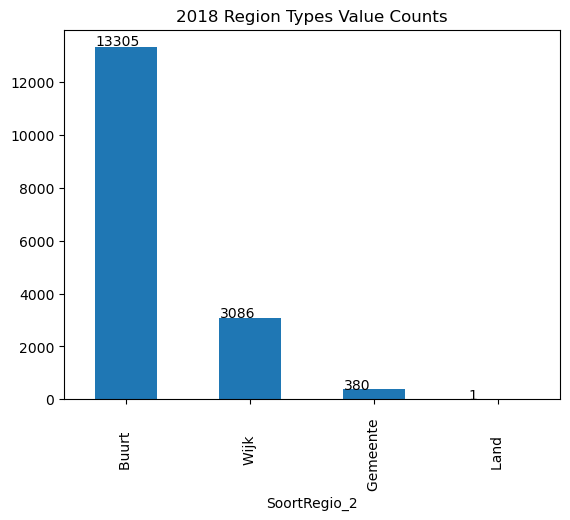

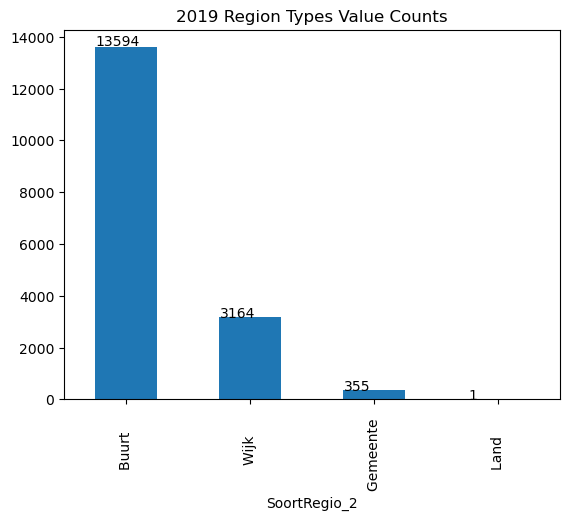

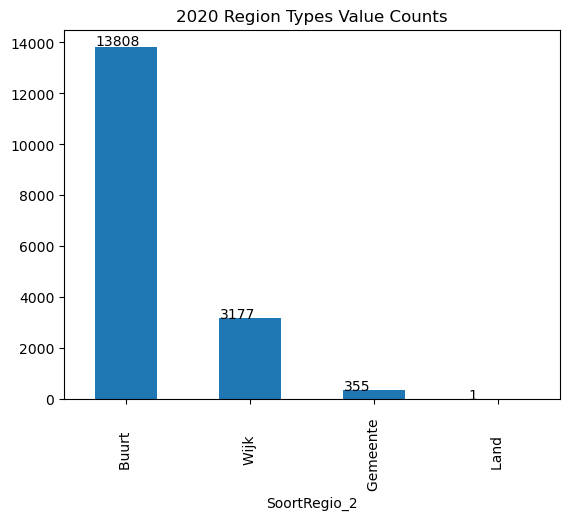

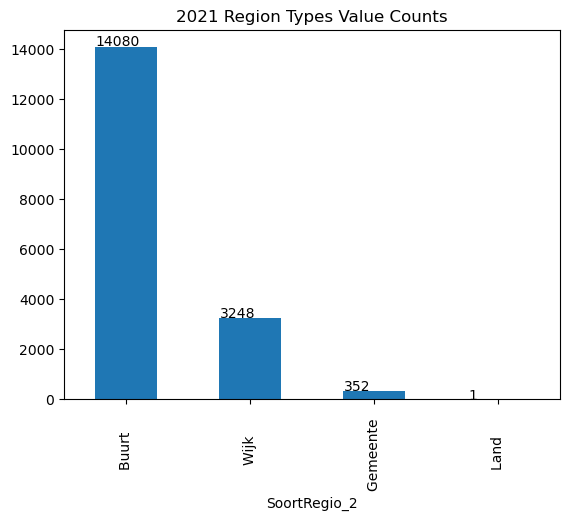

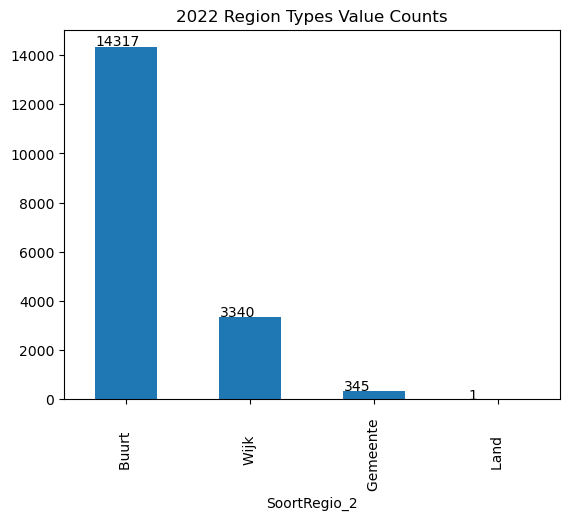

In [58]:
# In the previous output it can be seen that there are rows which contain information about districts instead of neighborhoods. These rows are unwanted and need to be removed.
# So, first a bar plot is made to see how many rows contain information about districts instead of neighborhoods, and if there are missing values or other unwanted values.

# This piece of code creates a function which is used to plot a bar chart based on the dataframe (df), the column name (column), and the title of the plot (title).
def plot_value_counts(df, column, title):
    ax = df[column].value_counts().plot(kind='bar')
    ax.set_title(title)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

# Here, the function that was defined above can be used to create bar plots for each dataframe. 
plot_value_counts(CBS_2018_final, 'SoortRegio_2', '2018 Region Types Value Counts')
plot_value_counts(CBS_2019_final, 'SoortRegio_2', '2019 Region Types Value Counts')
plot_value_counts(CBS_2020_final, 'SoortRegio_2', '2020 Region Types Value Counts')
plot_value_counts(CBS_2021_final, 'SoortRegio_2', '2021 Region Types Value Counts')
plot_value_counts(CBS_2022_final, 'SoortRegio_2', '2022 Region Types Value Counts')

# The output shows that there are rows containing information about neighborhoods (Buurt), districts (Wijk), municipalities (Gemeente), and the country as a whole (Land).

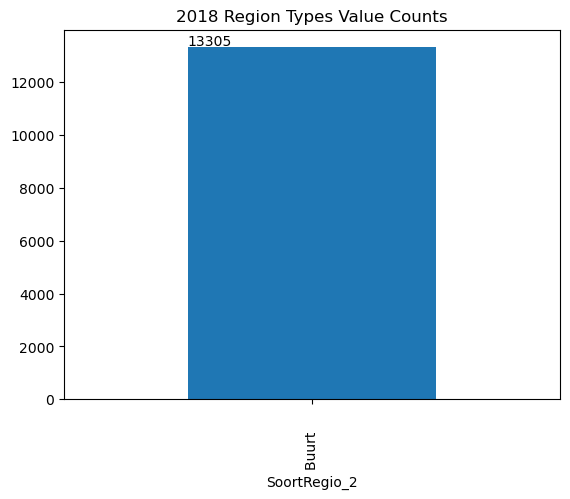

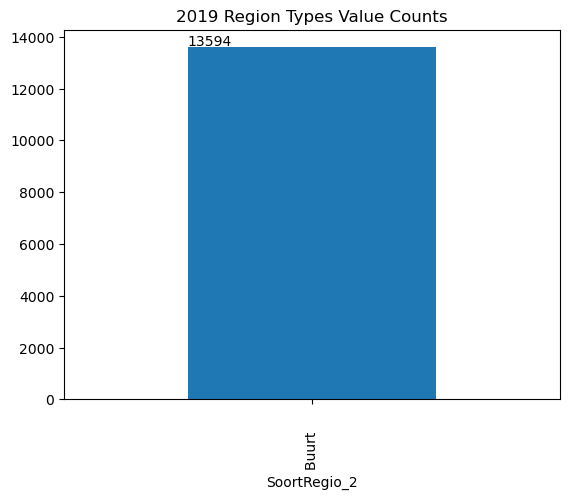

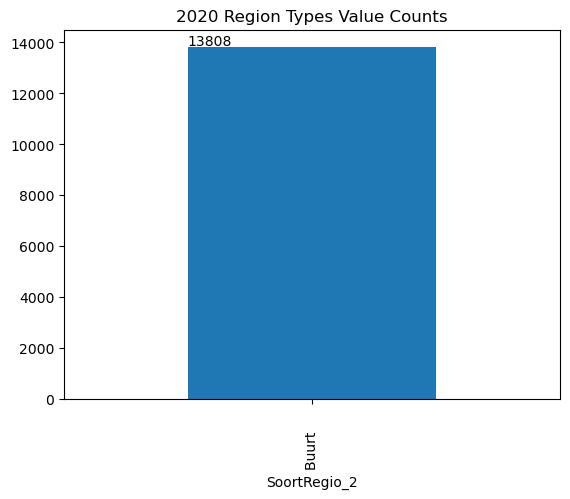

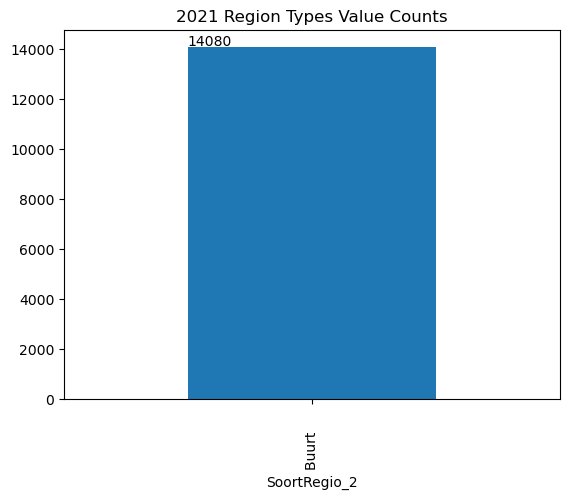

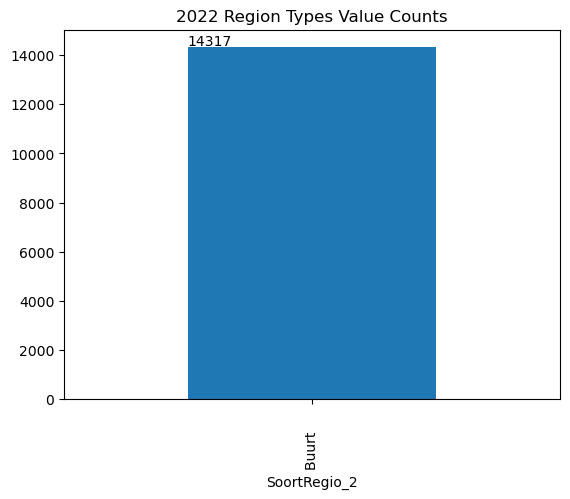

In [59]:
# The rows containing information about districts (Wijk), municipalities (Gemeente), and the country as a whole (Land) need to be removed.
# To do this, firstly, a the datasets are copied to new ones to prevent adaptations in the original datasets. 

# Copy the DataFrames
CBS_2018_final_copy = CBS_2018_final.copy()
CBS_2019_final_copy = CBS_2019_final.copy()
CBS_2020_final_copy = CBS_2020_final.copy()
CBS_2021_final_copy = CBS_2021_final.copy()
CBS_2022_final_copy = CBS_2022_final.copy()

# List of values to exclude
values_to_exclude = ['Wijk', 'Gemeente', 'Land']

# Remove the rows that contain the specified values in the 'SoortRegio_2' column/
# Note that the 'str.strip()' method is used to remove leading and trailing whitespaces from the values. 
CBS_2018_final_copy = CBS_2018_final_copy[~CBS_2018_final_copy['SoortRegio_2'].str.strip().isin(values_to_exclude)]
CBS_2019_final_copy = CBS_2019_final_copy[~CBS_2019_final_copy['SoortRegio_2'].str.strip().isin(values_to_exclude)]
CBS_2020_final_copy = CBS_2020_final_copy[~CBS_2020_final_copy['SoortRegio_2'].str.strip().isin(values_to_exclude)]
CBS_2021_final_copy = CBS_2021_final_copy[~CBS_2021_final_copy['SoortRegio_2'].str.strip().isin(values_to_exclude)]
CBS_2022_final_copy = CBS_2022_final_copy[~CBS_2022_final_copy['SoortRegio_2'].str.strip().isin(values_to_exclude)]

# To check if the adaptation has worked, the bar plots are created again.
# This piece of code creates a function which is used to plot a bar chart based on the dataframe (df), the column name (column), and the title of the plot (title).
def plot_value_counts(df, column, title):
    ax = df[column].value_counts().plot(kind='bar')
    ax.set_title(title)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

# Here, the function that was defined above can be used to create bar plots for each dataframe. 
plot_value_counts(CBS_2018_final_copy, 'SoortRegio_2', '2018 Region Types Value Counts')
plot_value_counts(CBS_2019_final_copy, 'SoortRegio_2', '2019 Region Types Value Counts')
plot_value_counts(CBS_2020_final_copy, 'SoortRegio_2', '2020 Region Types Value Counts')
plot_value_counts(CBS_2021_final_copy, 'SoortRegio_2', '2021 Region Types Value Counts')
plot_value_counts(CBS_2022_final_copy, 'SoortRegio_2', '2022 Region Types Value Counts')

# The output shows that the rows containing information about districts (Wijk), municipalities (Gemeente), and the country as a whole (Land) are properly removed.

In [60]:
# After removing irrelevant rows, the irrelevant columns can be removed.

# List of columns to drop
columns_to_drop = ['WijkenEnBuurten', 'SoortRegio_2']

# Drop the columns from each DataFrame
CBS_2018_deletedrowscolumns = CBS_2018_final_copy.drop(columns=columns_to_drop)
CBS_2019_deletedrowscolumns = CBS_2019_final_copy.drop(columns=columns_to_drop)
CBS_2020_deletedrowscolumns = CBS_2020_final_copy.drop(columns=columns_to_drop)
CBS_2021_deletedrowscolumns = CBS_2021_final_copy.drop(columns=columns_to_drop)
CBS_2022_deletedrowscolumns = CBS_2022_final_copy.drop(columns=columns_to_drop)

# Check if the columns are the same for each DataFrame
# Get a list of the columns
CBS_2018_list_deletedrowscolumns = CBS_2018_deletedrowscolumns.columns.tolist()
CBS_2019_list_deletedrowscolumns = CBS_2019_deletedrowscolumns.columns.tolist()
CBS_2020_list_deletedrowscolumns = CBS_2020_deletedrowscolumns.columns.tolist()
CBS_2021_list_deletedrowscolumns = CBS_2021_deletedrowscolumns.columns.tolist()
CBS_2022_list_deletedrowscolumns = CBS_2022_deletedrowscolumns.columns.tolist()

print(CBS_2018_list_deletedrowscolumns)
print(CBS_2019_list_deletedrowscolumns)
print(CBS_2020_list_deletedrowscolumns)
print(CBS_2021_list_deletedrowscolumns)
print(CBS_2022_list_deletedrowscolumns)

['Codering_3', 'AfstandTotHuisartsenpraktijk_5', 'AfstandTotHuisartsenpost_9', 'AfstandTotApotheek_10', 'AfstandTotZiekenhuis_11', 'AfstandTotZiekenhuis_15', 'AfstandTotConsultatiebureau_19', 'AfstandTotFysiotherapeut_20', 'AfstandTotGroteSupermarkt_24', 'AfstandTotOvDagelLevensmiddelen_28', 'AfstandTotWarenhuis_32', 'AfstandTotCafeED_36', 'AfstandTotCafetariaED_40', 'AfstandTotRestaurant_44', 'AfstandTotHotelED_48', 'AfstandTotKinderdagverblijf_52', 'AfstandTotBuitenschoolseOpvang_56', 'AfstandTotSchool_60', 'AfstandTotSchool_64', 'AfstandTotSchool_68', 'AfstandTotSchool_72']
['Codering_3', 'AfstandTotHuisartsenpraktijk_5', 'AfstandTotHuisartsenpost_9', 'AfstandTotApotheek_10', 'AfstandTotZiekenhuis_11', 'AfstandTotZiekenhuis_15', 'AfstandTotConsultatiebureau_19', 'AfstandTotFysiotherapeut_20', 'AfstandTotGroteSupermarkt_24', 'AfstandTotOvDagelLevensmiddelen_28', 'AfstandTotWarenhuis_32', 'AfstandTotCafeED_36', 'AfstandTotCafetariaED_40', 'AfstandTotRestaurant_44', 'AfstandTotHotelED_

In [61]:
# ---------------------------------------------- PART 2 ---------------------------------------------- #	
# The following part of the code deals with translating the Dutch column names to English.

In [62]:
# Now the column names should be made clearer. The index numbers need to be removed.
# The names should be translated to English.

# Initialize the Translator object
translator = Translator()

# Function to rename and translate column names
def rename_and_translate_columns(df):
    new_columns = {}
    for col in df.columns:
        # Remove the part after the last underscore
        new_col = col.rsplit('_', 1)[0]
        # Insert a space before a capital letter
        new_col = re.sub(r"(?<=\w)([A-Z])", r" \1", new_col)
        # Translate the new column name to English
        translated_col = translator.translate(new_col, dest='en').text
        # Remove spaces
        translated_col = translated_col.replace(' ', '')
        new_columns[col] = translated_col
    return new_columns

# Translate the column names of CBS_2018_deletedrowscolumns.
# It is chosen to only translate this datasets, since the column names are the same for all datasets. Translating all datasets seperately would mean a difference in translated column names. 
translated_columns = rename_and_translate_columns(CBS_2018_deletedrowscolumns)

# Apply the translated column names to each DataFrame
CBS_2018_translated = CBS_2018_deletedrowscolumns.rename(columns=translated_columns)
CBS_2019_translated = CBS_2019_deletedrowscolumns.rename(columns=translated_columns)
CBS_2020_translated = CBS_2020_deletedrowscolumns.rename(columns=translated_columns)
CBS_2021_translated = CBS_2021_deletedrowscolumns.rename(columns=translated_columns)
CBS_2022_translated = CBS_2022_deletedrowscolumns.rename(columns=translated_columns)

# Check if the process has worked
# Get a list of the columns
CBS_2018_list_4 = CBS_2018_translated.columns.tolist()
CBS_2019_list_4 = CBS_2019_translated.columns.tolist()
CBS_2020_list_4 = CBS_2020_translated.columns.tolist()
CBS_2021_list_4 = CBS_2021_translated.columns.tolist()
CBS_2022_list_4 = CBS_2022_translated.columns.tolist()

print(CBS_2018_list_4)
print(CBS_2019_list_4)
print(CBS_2020_list_4)
print(CBS_2021_list_4)
print(CBS_2022_list_4)

['Coding', 'DistancetoGPpractice', 'DistancetoGPstation', 'Distancetopharmacy', 'Distancetohospital', 'Distancetohospital', 'Distancetoconsultationoffice', 'Distancetophysiotherapist', 'Distancetolargesupermarket', 'DistancetoOVDagelFoods', 'Distancetodepartmentstore', 'DistancetoCafeED', 'Distancetocafeteriaed', 'DistancetoRestaurant', 'DistancetoHotelED', 'Distancetodaycare', 'Distancetoout-of-schoolcare', 'Distancetoschool', 'Distancetoschool', 'Distancetoschool', 'Distancetoschool']
['Coding', 'DistancetoGPpractice', 'DistancetoGPstation', 'Distancetopharmacy', 'Distancetohospital', 'Distancetohospital', 'Distancetoconsultationoffice', 'Distancetophysiotherapist', 'Distancetolargesupermarket', 'DistancetoOVDagelFoods', 'Distancetodepartmentstore', 'DistancetoCafeED', 'Distancetocafeteriaed', 'DistancetoRestaurant', 'DistancetoHotelED', 'Distancetodaycare', 'Distancetoout-of-schoolcare', 'Distancetoschool', 'Distancetoschool', 'Distancetoschool', 'Distancetoschool']
['Coding', 'Dist

In [63]:
# Based on the previous output, it can be seen that multiple columns have the same name. 
# This is because the columns are named after the facility that is considered but these have different specifications.
# Therefore, Statline is considered to rename the columns to the facility name and the specification.

# Define the new column names
new_column_names = {
    'Coding': 'neighborhoodcode', 
    'Distancetohospital': ['Distancetohospitalincludingpoliclinic', 'Distancetohospitalexcludingpoliclinic'],
    'DistancetoOVDagelFoods': 'Distancetodailylifeprovisions',
    'Distance': 'Distancetodepartmentstore',
    'DistancetoCafeED': 'Distancetobar',
    'Distancetocafeteriaed': 'Distancetocafeteria',
    'DistancetoHotelED': 'Distancetohotel',
    'Distancetoschool': ['DistanceToPrimaryEducation', 'DistanceToSecundaryEducation', 'DistanceToVMBO', 'DistanceToHAVOVWO']
}

# Function to rename specific columns
def rename_specific_columns(df, new_column_names):
    for old_name, new_names in new_column_names.items():
        if isinstance(new_names, list):
            # Get the indices of the columns with the old name
            indices = [i for i, col in enumerate(df.columns) if col == old_name]
            for i, new_name in zip(indices, new_names):
                df.columns.values[i] = new_name
        else:
            df = df.rename(columns={old_name: new_names})
    return df

# Apply the function to each DataFrame
CBS_2018_translated_good, CBS_2019_translated_good, CBS_2020_translated_good, CBS_2021_translated_good, CBS_2022_translated_good = [rename_specific_columns(df, new_column_names) for df in [CBS_2018_translated, CBS_2019_translated, CBS_2020_translated, CBS_2021_translated, CBS_2022_translated]]

# Check if the process has worked
# Get a list of the columns
CBS_2018_list_5 = CBS_2018_translated_good.columns.tolist()
CBS_2019_list_5 = CBS_2019_translated_good.columns.tolist()
CBS_2020_list_5 = CBS_2020_translated_good.columns.tolist()
CBS_2021_list_5 = CBS_2021_translated_good.columns.tolist()
CBS_2022_list_5 = CBS_2022_translated_good.columns.tolist()

print(CBS_2018_list_5)
print(CBS_2019_list_5)
print(CBS_2020_list_5)
print(CBS_2021_list_5)
print(CBS_2022_list_5)


['neighborhoodcode', 'DistancetoGPpractice', 'DistancetoGPstation', 'Distancetopharmacy', 'Distancetohospitalincludingpoliclinic', 'Distancetohospitalexcludingpoliclinic', 'Distancetoconsultationoffice', 'Distancetophysiotherapist', 'Distancetolargesupermarket', 'Distancetodailylifeprovisions', 'Distancetodepartmentstore', 'Distancetobar', 'Distancetocafeteria', 'DistancetoRestaurant', 'Distancetohotel', 'Distancetodaycare', 'Distancetoout-of-schoolcare', 'DistanceToPrimaryEducation', 'DistanceToSecundaryEducation', 'DistanceToVMBO', 'DistanceToHAVOVWO']
['neighborhoodcode', 'DistancetoGPpractice', 'DistancetoGPstation', 'Distancetopharmacy', 'Distancetohospitalincludingpoliclinic', 'Distancetohospitalexcludingpoliclinic', 'Distancetoconsultationoffice', 'Distancetophysiotherapist', 'Distancetolargesupermarket', 'Distancetodailylifeprovisions', 'Distancetodepartmentstore', 'Distancetobar', 'Distancetocafeteria', 'DistancetoRestaurant', 'Distancetohotel', 'Distancetodaycare', 'Distancet

In [64]:
# Show random rows of the datasets to check if the datasets are ready for the exploratory analysis.
display(CBS_2018_translated_good.sample(10))
display(CBS_2019_translated_good.sample(10))
display(CBS_2020_translated_good.sample(10))
display(CBS_2021_translated_good.sample(10))
display(CBS_2022_translated_good.sample(10))

,neighborhoodcode,DistancetoGPpractice,DistancetoGPstation,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetoconsultationoffice,Distancetophysiotherapist,Distancetolargesupermarket,Distancetodailylifeprovisions,...,Distancetobar,Distancetocafeteria,DistancetoRestaurant,Distancetohotel,Distancetodaycare,Distancetoout-of-schoolcare,DistanceToPrimaryEducation,DistanceToSecundaryEducation,DistanceToVMBO,DistanceToHAVOVWO
7684,BU19110600,0.9,11.5,5.0,11.6,15.4,None,None,1.1,1.0,...,0.9,1.0,1.1,1.4,0.8,0.8,0.6,8.0,11.1,12.0
9024,BU09954110,0.3,1.3,0.3,1.3,1.3,None,None,0.1,0.1,...,0.1,0.1,0.1,1.7,0.4,0.4,0.2,0.8,0.8,1.8
8108,BU03530027,0.7,4.2,0.9,4.2,4.2,None,None,0.9,0.6,...,0.8,0.8,0.6,1.0,0.6,0.6,0.6,1.5,1.5,1.8
5470,BU19241006,1.9,4.4,2.2,4.4,4.4,None,None,1.7,1.5,...,1.8,1.8,2.1,10.4,1.6,1.6,1.6,2.2,2.2,2.3
13469,BU00930110,0.5,65.9,0.5,40.8,65.9,None,None,0.3,0.3,...,0.3,0.2,0.2,0.3,0.4,5.8,0.4,0.5,0.5,39.2
13929,BU17000008,0.6,9.9,1.8,6.8,9.9,None,None,1.2,0.7,...,0.7,0.6,0.7,8.0,1.9,2.0,0.8,2.3,2.3,6.8
4407,BU03850201,0.5,10.8,0.7,1.4,10.8,None,None,0.4,0.2,...,0.3,0.3,0.3,0.4,0.6,2.8,0.4,1.4,1.4,1.4
15384,BU06680501,1.1,13.8,2.5,2.6,13.8,None,None,2.4,2.2,...,1.1,1.1,1.0,2.9,1.3,1.3,1.3,2.6,2.6,4.8
10206,BU19550205,1.6,6.3,1.7,6.3,6.3,None,None,1.1,1.1,...,1.5,1.5,1.5,1.7,1.3,1.3,1.4,2.2,2.2,2.2
7148,BU05300701,0.5,16.0,0.4,0.4,16.0,None,None,0.2,0.3,...,0.3,0.3,0.2,2.8,0.7,1.1,0.5,3.1,3.1,3.1


,neighborhoodcode,DistancetoGPpractice,DistancetoGPstation,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetoconsultationoffice,Distancetophysiotherapist,Distancetolargesupermarket,Distancetodailylifeprovisions,...,Distancetobar,Distancetocafeteria,DistancetoRestaurant,Distancetohotel,Distancetodaycare,Distancetoout-of-schoolcare,DistanceToPrimaryEducation,DistanceToSecundaryEducation,DistanceToVMBO,DistanceToHAVOVWO
6737,BU03981803,1.5,8.5,1.7,3.6,11.3,None,None,1.6,1.4,...,1.5,1.5,1.4,3.7,1.2,1.2,1.2,1.3,2.7,1.3
12140,BU17420209,2.3,11.2,2.6,2.6,11.2,None,None,2.2,1.9,...,2.2,2.1,0.7,2.1,1.8,1.9,1.6,1.3,1.3,4.8
9443,BU02630301,1.4,12.9,4.0,12.3,20.3,None,None,4.0,3.2,...,0.7,1.5,1.4,5.6,1.3,4.0,1.7,11.8,11.8,13.7
11207,BU15860105,0.5,11.2,0.5,11.2,11.2,None,None,0.3,0.1,...,0.2,0.2,0.2,1.0,0.4,0.6,0.6,0.6,0.6,0.6
4001,BU02220908,1.0,1.5,1.5,1.6,1.6,None,None,2.1,1.3,...,1.7,1.7,1.3,1.6,1.4,1.4,1.7,0.9,1.1,1.5
8977,BU09951662,1.1,3.3,1.2,3.3,3.3,None,None,1.4,1.2,...,1.4,1.3,0.6,2.6,0.6,0.6,1.3,2.3,2.3,2.3
9962,BU19520502,3.7,18.5,3.8,9.2,18.3,None,None,3.7,3.7,...,4.3,3.7,2.6,4.6,2.4,2.4,3.0,4.4,4.4,4.4
8158,BU03530025,0.3,5.1,0.5,5.1,5.1,None,None,0.5,0.5,...,0.6,0.4,0.4,1.7,0.5,0.4,0.5,2.3,2.3,2.7
12017,BU16670009,2.8,6.1,6.3,22.6,22.6,None,None,3.3,2.2,...,3.4,2.8,3.1,3.3,2.9,2.9,3.1,7.5,7.5,7.5
333,BU01411406,0.3,3.5,0.5,3.5,3.5,None,None,0.4,0.4,...,0.4,0.4,0.4,2.3,0.8,0.9,0.8,0.7,0.7,1.0


,neighborhoodcode,DistancetoGPpractice,DistancetoGPstation,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetoconsultationoffice,Distancetophysiotherapist,Distancetolargesupermarket,Distancetodailylifeprovisions,...,Distancetobar,Distancetocafeteria,DistancetoRestaurant,Distancetohotel,Distancetodaycare,Distancetoout-of-schoolcare,DistanceToPrimaryEducation,DistanceToSecundaryEducation,DistanceToVMBO,DistanceToHAVOVWO
17248,BU01931000,0.5,2.7,0.5,2.7,2.7,None,None,0.2,0.1,...,0.1,0.1,0.1,0.5,0.5,0.8,0.8,0.9,1.0,0.9
3375,BU05020993,0.6,3.2,0.6,3.2,3.2,None,None,1.0,1.2,...,1.1,0.7,1.1,2.4,0.8,0.6,0.8,2.6,2.6,2.6
5329,BU16520408,2.2,7.9,2.4,6.5,7.9,None,None,2.3,2.1,...,2.2,2.2,0.5,5.4,2.1,2.1,2.2,5.3,5.3,5.6
112,BU01970303,1.2,12.3,1.3,12.3,12.3,None,None,1.7,1.1,...,1.1,0.8,1.2,4.4,1.0,1.0,1.0,1.5,1.5,1.5
14974,BU04530501,0.5,1.8,0.8,0.8,1.8,None,None,0.8,0.7,...,0.9,0.8,0.8,3.1,0.9,0.9,0.9,2.3,2.3,2.4
13504,BU19040118,0.6,6.1,0.3,6.1,6.1,None,None,0.3,0.1,...,0.2,0.1,0.0,3.4,0.4,0.2,0.4,3.2,3.2,3.2
6480,BU01601301,2.3,5.1,2.4,4.9,4.9,None,None,2.2,1.2,...,3.3,2.1,2.2,2.6,1.8,1.9,2.4,4.1,4.1,4.1
13770,BU19002018,3.9,12.1,3.9,12.1,12.1,None,None,3.2,3.2,...,3.0,3.0,4.5,6.0,2.7,2.8,0.3,9.1,9.1,11.7
6503,BU01602201,4.4,6.0,4.4,5.8,5.8,None,None,3.3,2.0,...,4.7,1.3,1.0,2.0,3.2,3.2,3.2,5.0,5.0,5.0
13650,BU19000602,4.6,7.8,4.5,7.8,7.8,None,None,4.4,4.2,...,4.7,4.4,2.5,4.6,3.2,3.2,1.6,6.8,6.8,6.8


,neighborhoodcode,DistancetoGPpractice,DistancetoGPstation,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetoconsultationoffice,Distancetophysiotherapist,Distancetolargesupermarket,Distancetodailylifeprovisions,...,Distancetobar,Distancetocafeteria,DistancetoRestaurant,Distancetohotel,Distancetodaycare,Distancetoout-of-schoolcare,DistanceToPrimaryEducation,DistanceToSecundaryEducation,DistanceToVMBO,DistanceToHAVOVWO
17307,BU06380004,0.9,7.4,1.0,7.2,7.4,None,None,0.9,0.9,...,2.0,0.8,0.7,4.2,0.7,0.7,1.0,4.4,4.4,4.9
795,BU03071900,0.6,1.8,1.1,1.8,1.8,None,None,0.5,0.5,...,0.5,0.5,0.4,2.8,0.6,0.4,0.6,2.1,2.1,2.1
12152,BU18940002,3.4,19.9,5.8,6.2,19.5,None,None,5.4,2.9,...,1.9,1.9,2.9,4.2,2.0,2.0,2.0,6.8,6.8,6.8
12520,BU03401303,0.2,15.0,0.2,6.3,15.0,None,None,0.5,0.4,...,0.5,0.5,0.6,3.0,0.3,0.3,0.3,5.5,5.5,5.5
2404,BU18590106,3.3,11.7,3.3,3.4,13.4,None,None,3.5,2.5,...,3.0,3.3,1.4,2.8,2.5,2.7,2.5,2.8,2.8,8.4
9073,BU00808001,2.8,6.7,5.1,6.7,6.7,None,None,0.3,2.8,...,3.8,3.8,3.4,0.3,0.4,0.4,0.5,6.5,6.5,6.7
16553,BU17830352,1.3,5.5,1.4,4.5,11.8,None,None,1.3,1.0,...,1.3,1.3,1.0,1.7,1.2,1.2,1.2,5.3,5.3,5.5
12465,BU02750101,1.0,9.3,1.0,5.2,9.3,None,None,1.4,0.4,...,1.6,1.5,1.6,1.4,1.0,1.1,1.1,3.8,3.8,4.4
11822,BU00861602,0.7,6.4,0.7,6.4,6.4,None,None,0.6,0.5,...,0.6,0.6,0.6,5.1,0.4,0.4,0.4,5.2,5.2,5.2
17153,BU04730302,2.1,6.7,2.5,4.8,6.7,None,None,2.5,2.5,...,3.4,1.6,0.4,3.4,1.8,1.8,1.5,2.2,2.2,3.3


,neighborhoodcode,DistancetoGPpractice,DistancetoGPstation,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetoconsultationoffice,Distancetophysiotherapist,Distancetolargesupermarket,Distancetodailylifeprovisions,...,Distancetobar,Distancetocafeteria,DistancetoRestaurant,Distancetohotel,Distancetodaycare,Distancetoout-of-schoolcare,DistanceToPrimaryEducation,DistanceToSecundaryEducation,DistanceToVMBO,DistanceToHAVOVWO
9675,BU09951134,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
15601,BU09831104,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3659,BU01091116,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5567,BU07772010,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2108,BU07430501,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4373,BU05050100,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
16995,BU00981004,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
15773,BU09841702,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13742,BU00900006,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3715,BU01095064,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [65]:
# This piece of code deletes irrelevant 'distance-to' columns and merges very similar columns.
CBS_2018_translated_good_deleted = CBS_2018_translated_good.copy()
CBS_2019_translated_good_deleted = CBS_2019_translated_good.copy()
CBS_2020_translated_good_deleted = CBS_2020_translated_good.copy()
CBS_2021_translated_good_deleted = CBS_2021_translated_good.copy()
CBS_2022_translated_good_deleted = CBS_2022_translated_good.copy()

# List of columns to delete
cols_to_delete = ['Distancetoconsultationoffice', 'DistancetoGPstation', 'Distancetophysiotherapist', 'Distancetodepartmentstore', 'Distancetohotel', 'DistanceToVMBO', 'DistanceToHAVOVWO', 'Distancetohospitalexcludingpolickinic']

# Additional columns to delete after calculating averages
cols_to_delete_after_average = ['Distancetobar', 'Distancetocafeteria', 'DistancetoRestaurant', 'Distancetoout-of-schoolcare', 'Distancetodaycare']

# List of dataframes
dfs = [CBS_2018_translated_good_deleted, CBS_2019_translated_good_deleted, CBS_2020_translated_good_deleted, CBS_2021_translated_good_deleted, CBS_2022_translated_good_deleted]

# Function to delete columns and add 'averagedistancetoEATDRINK' column to a dataframe
def process_dataframe(df):
    df = df.drop(columns=cols_to_delete, errors='ignore')
    df['averagedistancetoEATDRINK'] = df[['Distancetobar', 'Distancetocafeteria', 'DistancetoRestaurant']].mean(axis=1)
    df['averageDistancetoDaycare'] = df[['Distancetoout-of-schoolcare', 'Distancetodaycare']].mean(axis=1)
    df = df.drop(columns=cols_to_delete_after_average, errors='ignore')
    return df

# Apply the function to each dataframe
CBS_2018_translated_good_deleted, CBS_2019_translated_good_deleted, CBS_2020_translated_good_deleted, CBS_2021_translated_good_deleted, CBS_2022_translated_good_deleted = map(process_dataframe, dfs)

In [66]:
# Show random rows of the datasets to check if the datasets are ready for the exploratory analysis.
display(CBS_2018_translated_good_deleted.sample(10))
display(CBS_2019_translated_good_deleted.sample(10))
display(CBS_2020_translated_good_deleted.sample(10))
display(CBS_2021_translated_good_deleted.sample(10))
display(CBS_2022_translated_good_deleted.sample(10))

,neighborhoodcode,DistancetoGPpractice,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetolargesupermarket,Distancetodailylifeprovisions,DistanceToPrimaryEducation,DistanceToSecundaryEducation,averagedistancetoEATDRINK,averageDistancetoDaycare
16694,BU01931210,1.0,1.1,1.6,1.6,0.8,0.5,0.7,0.9,0.933333,0.60
8489,BU08820101,0.9,1.0,6.3,7.5,0.7,0.4,0.5,1.4,0.433333,0.40
11134,BU08260200,1.0,2.2,1.9,1.9,0.5,0.6,0.5,0.4,0.366667,0.70
8478,BU08820004,0.8,1.2,5.7,5.7,0.8,0.5,0.9,1.0,0.300000,0.90
2750,BU01470001,0.4,0.6,5.7,5.7,0.3,0.3,0.9,1.4,0.300000,0.90
16595,BU06420203,1.1,1.0,2.9,2.9,1.1,0.8,0.8,1.4,0.433333,0.45
16579,BU06420103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13132,BU19040304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9783,BU01190001,0.4,0.3,2.6,2.6,0.2,0.2,0.3,0.6,0.266667,0.20
4225,BU17190400,0.8,0.8,16.0,16.0,0.9,0.5,0.7,9.2,0.600000,0.80


,neighborhoodcode,DistancetoGPpractice,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetolargesupermarket,Distancetodailylifeprovisions,DistanceToPrimaryEducation,DistanceToSecundaryEducation,averagedistancetoEATDRINK,averageDistancetoDaycare
7854,BU04053103,0.7,0.9,3.2,3.2,0.9,1.0,0.8,1.3,1.066667,0.55
14407,BU03440624,0.3,0.5,1.7,1.7,0.4,0.2,0.6,1.1,0.133333,0.20
16029,BU17830713,0.8,1.1,4.5,7.3,1.1,1.0,1.0,5.1,0.933333,0.85
7545,BU17350208,3.3,3.3,8.3,16.2,2.3,2.1,1.8,2.8,2.066667,1.90
10651,BU19700208,1.6,1.6,31.0,31.0,5.4,5.4,1.5,8.7,3.500000,3.45
316,BU01411200,0.7,1.3,5.1,5.1,0.3,1.1,0.4,0.4,0.866667,0.30
5997,BU17290300,1.9,1.9,9.4,9.4,2.0,0.3,2.9,2.9,0.666667,1.90
16755,BU06381004,0.4,2.1,3.2,3.2,0.4,1.6,0.4,2.5,1.366667,0.45
3235,BU05020225,0.9,1.1,2.6,2.6,0.8,0.7,1.1,0.6,1.033333,0.85
12700,BU16760001,1.9,5.9,0.9,24.3,0.9,0.7,0.7,2.1,0.733333,0.55


,neighborhoodcode,DistancetoGPpractice,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetolargesupermarket,Distancetodailylifeprovisions,DistanceToPrimaryEducation,DistanceToSecundaryEducation,averagedistancetoEATDRINK,averageDistancetoDaycare
1611,BU02001706,4.4,4.5,8.8,11.5,4.0,3.5,1.6,4.9,3.500000,1.75
4694,BU07722140,0.7,0.7,2.2,4.0,0.5,0.3,0.4,0.7,0.333333,0.40
3964,BU17741550,0.8,0.8,0.7,21.8,0.7,0.7,0.8,8.6,0.600000,0.80
13915,BU15251204,0.4,0.9,1.3,8.2,0.8,0.8,0.4,1.2,0.666667,0.25
13230,BU08470909,3.4,3.6,4.1,4.1,2.6,2.9,3.6,3.5,2.733333,3.40
5583,BU19420501,0.3,1.1,5.0,5.0,0.2,0.2,0.4,1.8,0.166667,0.60
329,BU01411402,0.8,0.7,2.9,2.9,0.7,0.3,0.4,0.7,0.500000,0.55
16069,BU17010509,4.7,4.7,20.7,20.7,5.0,4.9,5.2,6.7,6.033333,2.80
1770,BU01060400,1.4,1.3,3.6,3.8,0.8,0.8,1.1,1.2,1.300000,0.60
1469,BU03639403,0.2,0.8,3.7,3.7,0.9,0.4,0.4,1.0,0.966667,0.40


,neighborhoodcode,DistancetoGPpractice,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetolargesupermarket,Distancetodailylifeprovisions,DistanceToPrimaryEducation,DistanceToSecundaryEducation,averagedistancetoEATDRINK,averageDistancetoDaycare
8000,BU19111290,2.7,2.7,5.2,24.0,4.7,5.1,3.0,4.8,4.300000,2.40
4281,BU04980300,0.8,5.5,8.6,12.3,0.9,0.8,0.6,4.4,2.300000,0.75
1918,BU03080007,0.5,0.5,1.0,7.2,0.4,0.3,0.3,1.5,0.266667,0.30
14958,BU15810101,2.1,3.1,4.5,4.6,2.0,2.0,1.7,2.6,1.933333,1.85
16157,BU04570001,0.5,0.5,1.0,9.0,0.3,0.2,0.3,0.5,0.166667,0.35
6690,BU02430102,0.7,0.8,1.0,1.0,0.4,0.1,0.3,0.8,0.133333,0.65
11738,BU00851118,2.8,2.9,20.9,21.1,2.7,2.2,2.4,3.5,3.333333,2.50
7551,BU07961009,2.0,1.9,3.5,7.6,1.3,1.3,0.6,4.5,1.766667,0.60
15676,BU07180407,1.0,1.1,3.1,3.5,1.0,1.1,1.1,1.2,1.466667,1.10
15085,BU03450002,0.3,0.4,1.6,8.1,0.4,0.3,0.7,1.6,0.300000,0.80


,neighborhoodcode,DistancetoGPpractice,Distancetopharmacy,Distancetohospitalincludingpoliclinic,Distancetohospitalexcludingpoliclinic,Distancetolargesupermarket,Distancetodailylifeprovisions,DistanceToPrimaryEducation,DistanceToSecundaryEducation,averagedistancetoEATDRINK,averageDistancetoDaycare
8360,BU15070403,None,None,None,None,None,None,None,None,NaN,NaN
10299,BU19480403,None,None,None,None,None,None,None,None,NaN,NaN
17026,BU06140101,None,None,None,None,None,None,None,None,NaN,NaN
7330,BU04000200,None,None,None,None,None,None,None,None,NaN,NaN
5123,BU07723210,None,None,None,None,None,None,None,None,NaN,NaN
238,BU03610203,None,None,None,None,None,None,None,None,NaN,NaN
895,BU19591301,None,None,None,None,None,None,None,None,NaN,NaN
13607,BU18830102,None,None,None,None,None,None,None,None,NaN,NaN
12407,BU17340802,None,None,None,None,None,None,None,None,NaN,NaN
2635,BU18590109,None,None,None,None,None,None,None,None,NaN,NaN


In [67]:
# Before running the descriptive statistics, the datasets are saved as CSV files.
CBS_2018_translated_good_deleted.to_csv(f'intermediate/3_SN_dis_2018.csv', index=False, encoding='ISO-8859-1', sep=';')
CBS_2019_translated_good_deleted.to_csv(f'intermediate/3_SN_dis_2019.csv', index=False, encoding='ISO-8859-1', sep=';')
CBS_2020_translated_good_deleted.to_csv(f'intermediate/3_SN_dis_2020.csv', index=False, encoding='ISO-8859-1', sep=';')
CBS_2021_translated_good_deleted.to_csv(f'intermediate/3_SN_dis_2021.csv', index=False, encoding='ISO-8859-1', sep=';')
# CBS_2022_translated_good_deleted.to_csv(f'intermediate/3_SN_dis_2022.csv', index=False, encoding='ISO-8859-1', sep=';')

In [68]:
CBS_2022_translated_good_deleted = pd.read_csv(f'intermediate/3_SN_dis_2022.csv', sep=';')

In [69]:
# ---------------------------------------------- PART 3 ---------------------------------------------- #	
# The following part of the code concerns changes in the dataset because of high correlations between the columns concerning distances to amenities.
# It should be noted that the Ydata automatically selects the correct correlation method based on the type of data.

In [70]:
# Copying the dataframes to new ones to prevent changes in the original datasets.
CBS_2018_DS = CBS_2018_translated_good_deleted.copy()
CBS_2019_DS = CBS_2019_translated_good_deleted.copy()
CBS_2020_DS = CBS_2020_translated_good_deleted.copy()
CBS_2021_DS = CBS_2021_translated_good_deleted.copy()
CBS_2022_DS = CBS_2022_translated_good_deleted.copy()

# Defining the columns to drop due to reasoning for duplicate meanings or irrelevant columns.  
columns_to_drop = ['averageDistancetoDaycare', 'Distancetopharmacy', 'DistancetoGPpractice', 'averagedistancetoEATDRINK', 'Distancetohospitalincludingpoliclinic', 'Distancetohospitalexcludingpoliclinic']

# Dropping the columns from the datasets.
CBS_2018_DS = CBS_2018_DS.drop(columns=columns_to_drop)
CBS_2019_DS = CBS_2019_DS.drop(columns=columns_to_drop)
CBS_2020_DS = CBS_2020_DS.drop(columns=columns_to_drop)
CBS_2021_DS = CBS_2021_DS.drop(columns=columns_to_drop)
CBS_2022_DS = CBS_2022_DS.drop(columns=columns_to_drop)

In [71]:
# Show the datatypes of the columns. 
print("CBS_2018_DS:\n", CBS_2018_DS.dtypes)
print("CBS_2019_DS:\n", CBS_2019_DS.dtypes)
print("CBS_2020_DS:\n", CBS_2020_DS.dtypes)
print("CBS_2021_DS:\n", CBS_2021_DS.dtypes)
print("CBS_2022_DS:\n", CBS_2022_DS.dtypes)

CBS_2018_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2019_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2020_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2021_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2022_DS:
 neighborhoodcode                  object
Distancetolar

In [72]:
# Set column datatypes to float64 except for "neighborhoodcode"
CBS_2018_DS = CBS_2018_DS.astype({col: 'float64' for col in CBS_2018_DS.columns if col != 'neighborhoodcode'})
CBS_2019_DS = CBS_2019_DS.astype({col: 'float64' for col in CBS_2019_DS.columns if col != 'neighborhoodcode'})
CBS_2020_DS = CBS_2020_DS.astype({col: 'float64' for col in CBS_2020_DS.columns if col != 'neighborhoodcode'})
CBS_2021_DS = CBS_2021_DS.astype({col: 'float64' for col in CBS_2021_DS.columns if col != 'neighborhoodcode'})
CBS_2022_DS = CBS_2022_DS.astype({col: 'float64' for col in CBS_2022_DS.columns if col != 'neighborhoodcode'})

# Show the datatypes of the columns. 
print("CBS_2018_DS:\n", CBS_2018_DS.dtypes)
print("CBS_2019_DS:\n", CBS_2019_DS.dtypes)
print("CBS_2020_DS:\n", CBS_2020_DS.dtypes)
print("CBS_2021_DS:\n", CBS_2021_DS.dtypes)
print("CBS_2022_DS:\n", CBS_2022_DS.dtypes)

CBS_2018_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2019_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2020_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2021_DS:
 neighborhoodcode                  object
Distancetolargesupermarket       float64
Distancetodailylifeprovisions    float64
DistanceToPrimaryEducation       float64
DistanceToSecundaryEducation     float64
dtype: object
CBS_2022_DS:
 neighborhoodcode                  object
Distancetolar

In [73]:
# This piece of code deals with missing values of numerical columns

# Missingness
ALLOWABLE_NA_RATIO = 0.9                        # Drop rows with more than 90% missing values
IMPUTATION_METHOD_NUMERICAL = 'KNN'            # Mean or KNN, mean is faster but less accurate

def drop_rows_high_missingness_features(df, features, allowable_na_ratio=ALLOWABLE_NA_RATIO):
    allowable_na = int(allowable_na_ratio * len(features))
    num_rows_before = len(df)
    df = df.dropna(subset=features, thresh=allowable_na)
    num_rows_after = len(df)
    print(f'        >>> Dropped {num_rows_before - num_rows_after}/{num_rows_before} rows with more than {allowable_na} ({round(allowable_na_ratio*100, 0)}%) missing values.')
    return df

def impute_missing_values_features(df, features, imputation_method_numerical=IMPUTATION_METHOD_NUMERICAL):
    numerical_cols = [col for col in features if df[col].dtype == 'float64']
    if imputation_method_numerical == 'mean':
        print(f'        >>> Imputing missing values in numerical columns with the mean.')
        df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
    elif imputation_method_numerical == 'KNN':
        print(f'        >>> Imputing missing values in numerical columns with K-Nearest Neighbors.')
        from sklearn.impute import KNNImputer
        imputer = KNNImputer(n_neighbors=5)
        df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
    else:
        raise ValueError(f'Imputation method {imputation_method_numerical} not recognized.')

    return df

# Execute the defined functions for each DataFrame
dataframes = [CBS_2018_DS, CBS_2019_DS, CBS_2020_DS, CBS_2021_DS, CBS_2022_DS]

for i, df in enumerate(dataframes):
    print(f"Processing DataFrame {i+1}...")
    # Get the list of features (columns) in the DataFrame
    features = df.columns.tolist()
    
    # Drop rows with high missingness
    df = drop_rows_high_missingness_features(df.copy(), features)
    
    # Impute missing values
    df = impute_missing_values_features(df.copy(), features)
    
    # Update the DataFrame in the list
    dataframes[i] = df

# Update the original DataFrames
CBS_2018_DS, CBS_2019_DS, CBS_2020_DS, CBS_2021_DS, CBS_2022_DS = dataframes

Processing DataFrame 1...


        >>> Dropped 623/13305 rows with more than 4 (90.0%) missing values.
        >>> Imputing missing values in numerical columns with K-Nearest Neighbors.
Processing DataFrame 2...
        >>> Dropped 643/13594 rows with more than 4 (90.0%) missing values.
        >>> Imputing missing values in numerical columns with K-Nearest Neighbors.
Processing DataFrame 3...
        >>> Dropped 670/13808 rows with more than 4 (90.0%) missing values.
        >>> Imputing missing values in numerical columns with K-Nearest Neighbors.
Processing DataFrame 4...
        >>> Dropped 693/14080 rows with more than 4 (90.0%) missing values.
        >>> Imputing missing values in numerical columns with K-Nearest Neighbors.
Processing DataFrame 5...
        >>> Dropped 763/14317 rows with more than 4 (90.0%) missing values.
        >>> Imputing missing values in numerical columns with K-Nearest Neighbors.


In [74]:
# ---------------------------------------------- PART 4 ---------------------------------------------- #	
# The following part of the code generates the descriptive statistics report for the Statistics Netherlands geometry datasets. 

In [75]:
#  --------------------- This piece of code generates the intermdediate descriptive statistics reports for the datasets. --------------------- #

# Now that the datasets are cleaned, the descriptive statistics of the datasets can be checked.
# This piece of code checks the descriptive statistics of the datasets via the ydata_profiling package.
profile_statNED_distances_2018 = ProfileReport(CBS_2018_DS, title="Descripitve Statistics of the Statistics Netherlands with Distances for 2018", missing_diagrams={"Heatmap": False})
profile_statNED_distances_2018.to_file("output/3_DS_SN_dis_2018.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
# -------------------------------- Statistics Netherlands Distances 2019 --------------------------------
profile_statNED_distances_2019 = ProfileReport(CBS_2019_DS, title="Descripitve Statistics of the Statistics Netherlands with Distances for 2019")
profile_statNED_distances_2019.to_file("output/3_DS_SN_dis_2019.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
# -------------------------------- Statistics Netherlands Distances 2020 --------------------------------
profile_statNED_distances_2020 = ProfileReport(CBS_2020_DS, title="Descripitve Statistics of the Statistics Netherlands with Distances for 2020")
profile_statNED_distances_2020.to_file("output/3_DS_SN_dis_2020.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [78]:
# -------------------------------- Statistics Netherlands Distances 2021 --------------------------------
profile_statNED_distances_2021 = ProfileReport(CBS_2021_DS, title="Descripitve Statistics of the Statistics Netherlands with Distances for 2021")
profile_statNED_distances_2021.to_file("output/3_DS_SN_dis_2021.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
# -------------------------------- Statistics Netherlands Distances 2022 --------------------------------
profile_statNED_distances_2022 = ProfileReport(CBS_2022_DS, title="Descripitve Statistics of the Statistics Netherlands with Distances for 2022")
profile_statNED_distances_2022.to_file("output/3_DS_SN_dis_2022.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
# The Statistics Netherlands data concerning distances is solved, the datasets are saved as CSV files.
CBS_2018_DS.to_csv(f'output/3_SN_dis_2018.csv', index=False, encoding='ISO-8859-1', sep=';')
CBS_2019_DS.to_csv(f'output/3_SN_dis_2019.csv', index=False, encoding='ISO-8859-1', sep=';')
CBS_2020_DS.to_csv(f'output/3_SN_dis_2020.csv', index=False, encoding='ISO-8859-1', sep=';')
CBS_2021_DS.to_csv(f'output/3_SN_dis_2021.csv', index=False, encoding='ISO-8859-1', sep=';')
CBS_2022_DS.to_csv(f'output/3_SN_dis_2022.csv', index=False, encoding='ISO-8859-1', sep=';')